In [1]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

import cv2

Using TensorFlow backend.


In [2]:
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 4} )
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [23]:
num_classes = 7
classes = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]
batch_size = 256
epochs = 5
height, width = 128, 128

In [4]:
with open("../data/raw/facial_recognition/data.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [5]:
x_train, y_train, x_test, y_test = [], [], [], []
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

In [6]:
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], height, width, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], height, width, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [7]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
con

In [8]:
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [11]:
model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs)

Epoch 1/5
256/256 [==============================] - 318s 1s/step - loss: 1.7977 - acc: 0.2542
Epoch 2/5
256/256 [==============================] - 295s 1s/step - loss: 1.5984 - acc: 0.3650
Epoch 3/5
256/256 [==============================] - 300s 1s/step - loss: 1.4371 - acc: 0.4420
Epoch 4/5
256/256 [==============================] - 332s 1s/step - loss: 1.3047 - acc: 0.4988
Epoch 5/5
256/256 [==============================] - 341s 1s/step - loss: 1.2162 - acc: 0.5364


In [12]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

3589/3589 [==============================] - 5s 1ms/step
Test loss: 1.27108321714
Test accuracy: 51.2956255258


In [13]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

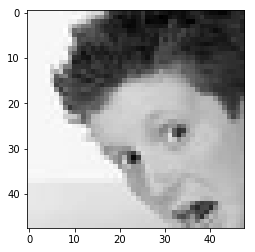

[ 0.05069941  0.00119866  0.17017581  0.07434029  0.54813969  0.02784641
  0.12759973]


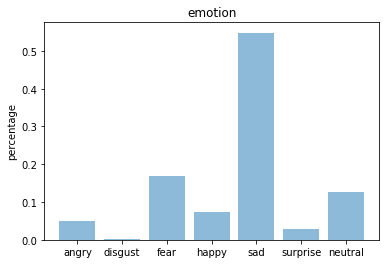

----------------------------------------------


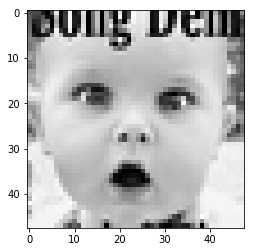

[ 0.06802635  0.00967999  0.09611247  0.0122376   0.01351951  0.79122835
  0.00919569]


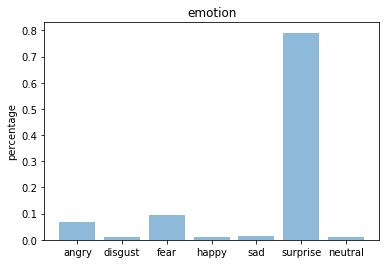

----------------------------------------------


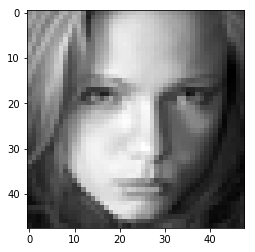

[ 0.13261047  0.01275852  0.18895048  0.04145254  0.37669882  0.01337322
  0.23415598]


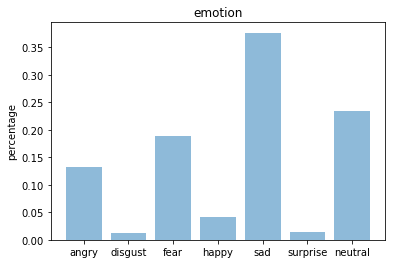

----------------------------------------------


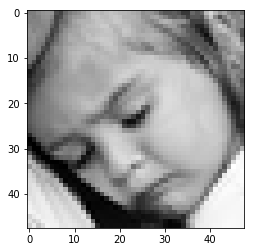

[ 0.04656795  0.00169312  0.09836926  0.24018486  0.46578765  0.01219228
  0.13520484]


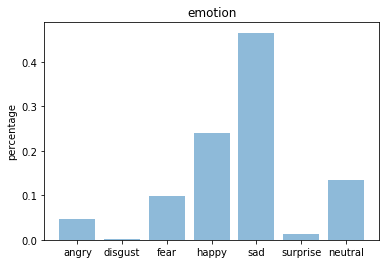

----------------------------------------------


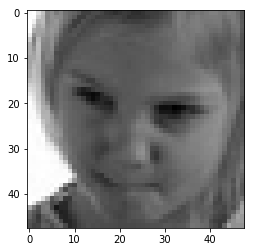

[ 0.20725556  0.01545886  0.13231987  0.05337034  0.3987056   0.00697445
  0.18591528]


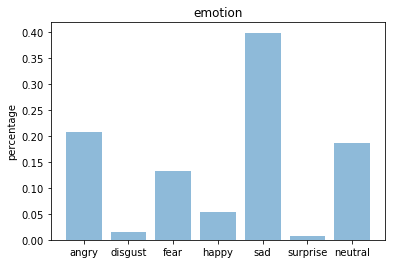

----------------------------------------------


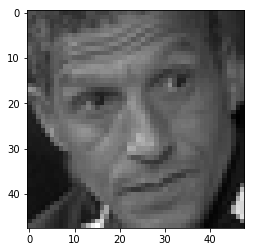

[ 0.099968    0.00344299  0.10292355  0.06008933  0.22760898  0.03238781
  0.47357926]


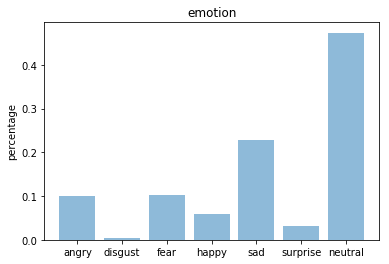

----------------------------------------------


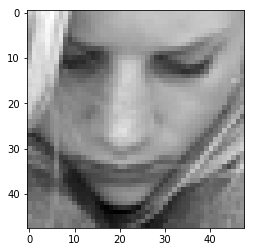

[ 0.03219058  0.00291517  0.16497774  0.0252625   0.69592094  0.00292071
  0.0758124 ]


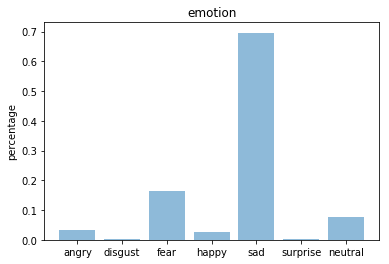

----------------------------------------------


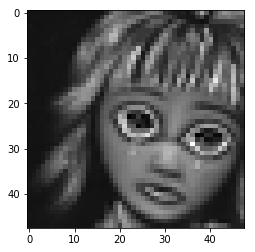

[ 0.08488357  0.00187668  0.10274356  0.33256528  0.25188178  0.04943825
  0.1766109 ]


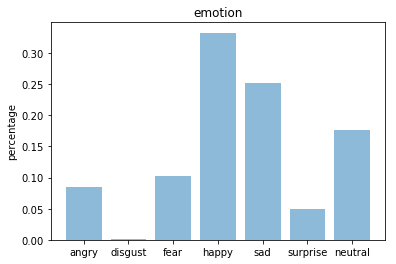

----------------------------------------------


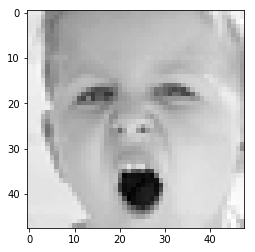

[ 0.58565295  0.04117362  0.21559522  0.03697063  0.08624046  0.01969328
  0.01467387]


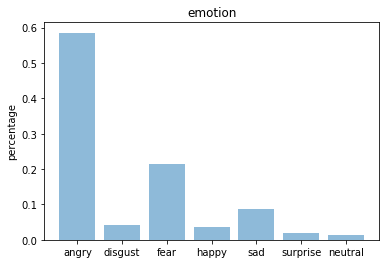

----------------------------------------------


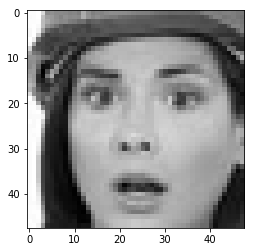

[  2.12169020e-03   6.75473348e-05   1.03393175e-01   2.57598353e-03
   2.55728909e-03   8.87483358e-01   1.80095737e-03]


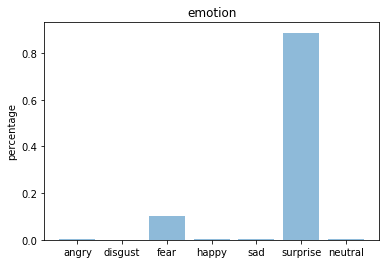

----------------------------------------------


In [18]:
monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

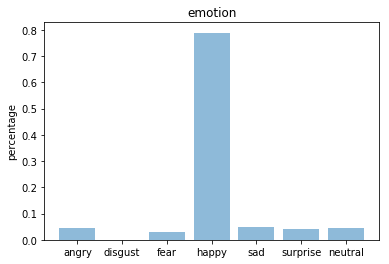

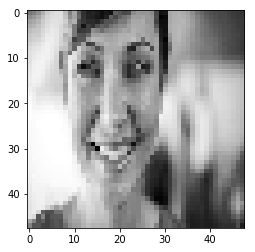

In [16]:
img = image.load_img("happy.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

In [ ]:
face_cascade = cv2.CascadeClassifier('C:/ProgramData/Anaconda3/envs/tensorflow/Library/etc/haarcascades/haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

In [2]:
emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

while(True):
	ret, img = cap.read()
	#img = cv2.imread('C:/Users/IS96273/Desktop/hababam.jpg')

	gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

	faces = face_cascade.detectMultiScale(gray, 1.3, 5)

	#print(faces) #locations of detected faces

	for (x,y,w,h) in faces:
		cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image
		
		detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
		detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY) #transform to gray scale
		detected_face = cv2.resize(detected_face, (48, 48)) #resize to 48x48
		
		img_pixels = image.img_to_array(detected_face)
		img_pixels = np.expand_dims(img_pixels, axis = 0)
		
		img_pixels /= 255 #pixels are in scale of [0, 255]. normalize all pixels in scale of [0, 1]
		
		predictions = model.predict(img_pixels) #store probabilities of 7 expressions
		
		#find max indexed array 0: angry, 1:disgust, 2:fear, 3:happy, 4:sad, 5:surprise, 6:neutral
		max_index = np.argmax(predictions[0])
		
		emotion = emotions[max_index]
		
		#write emotion text above rectangle
		cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
		
		#process on detected face end
		#-------------------------

	cv2.imshow('img',img)

	if cv2.waitKey(1) & 0xFF == ord('q'): #press q to quit
		break

#kill open cv things		
cap.release()
cv2.destroyAllWindows()

NameError: name 'cap' is not defined